# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

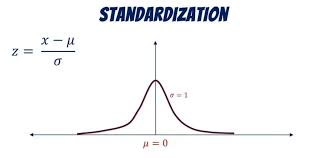


In [ ]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Ebola dataset
df = pd.read_csv('/content/ebola_2014_2016_clean.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Handle missing values using mean (NumPy logic)
X = numeric_df.values
col_means = np.nanmean(X, axis=0)
inds = np.where(np.isnan(X))
X[inds] = np.take(col_means, inds[1])

# Standardization (NumPy only)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

X_standardized[:5]


array([[-0.43123741, -0.36137974],
       [-0.57357428, -0.616856  ],
       [-0.34569952, -0.36621144],
       [-0.26604518, -0.20193356],
       [-0.29252119, -0.32453801]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(X_standardized.T)
cov_matrix


array([[1.00040258, 0.95559198],
       [0.95559198, 1.00040258]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors


(array([1.95599455, 0.0448106 ]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvalues = eigenvalues[sorted_indices]

sorted_eigenvectors


array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = 2
principal_components = sorted_eigenvectors[:, :num_components]

reduced_data = np.dot(X_standardized, principal_components)
reduced_data[:5]


array([[-0.56046496,  0.04939683],
       [-0.84176133, -0.0306048 ],
       [-0.50339707, -0.01450412],
       [-0.33091094,  0.04533376],
       [-0.43632675, -0.02263931]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
reduced_data[:5]


Reduced Data Shape: (2485, 2)


array([[-0.56046496,  0.04939683],
       [-0.84176133, -0.0306048 ],
       [-0.50339707, -0.01450412],
       [-0.33091094,  0.04533376],
       [-0.43632675, -0.02263931]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

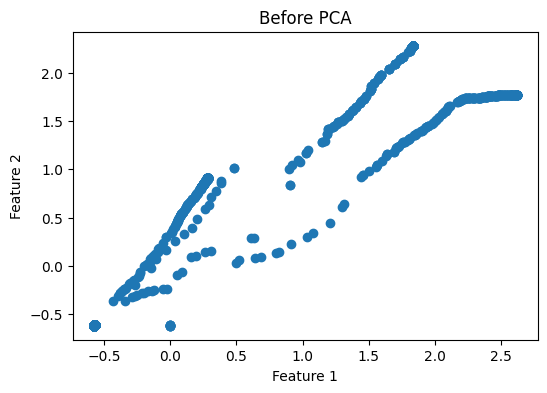

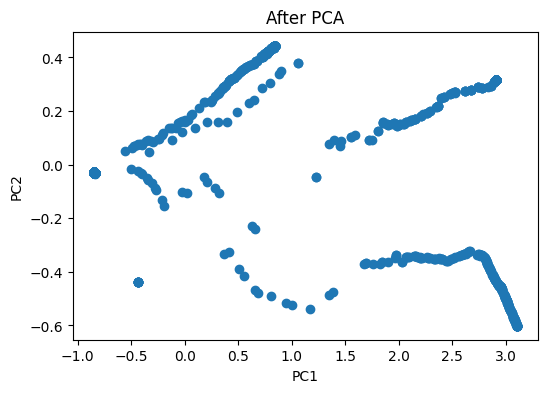

In [ ]:
# Step 8: Visualize Before PCA
# Plot original data (first two features for simplicity)

plt.figure(figsize=(6,4))
plt.scatter(X_standardized[:, 0], X_standardized[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA')
plt.show()

# Plot reduced data after PCA

plt.figure(figsize=(6,4))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('After PCA')
plt.show()


